## 1.1 Python Warmup

In [1]:
import re # for removing punctuation
from nltk.corpus import stopwords #for filtering stopwords
from collections import Counter #for counting the frequency of the words"

In [2]:
with open('random_text.txt','r') as f: #opens a file
    text = f.read().lower()

#to tokenize words properly, we are required to remove the punctuations from the tokens.
words = []
for word in text.split():
    words.append(re.sub(r'[^\w\s]', '', word)) #reference:https://www.geeksforgeeks.org/python-remove-punctuation-from-string/
#The re.sub function is used to subsitute a pattern with some other pattern or when passed empty string it simply deletes it. 

In [3]:
stoplist = stopwords.words('english') #brings the default English NLTK stop words
clean = [word for word in words if word not in stoplist] #here the stopwords is removed from the list
count = Counter(clean) #counts the frequency of each word
print('The number of unique non-stop words are', len(count))
print('The top 5 most common words and the time they have repeated are')
print(count.most_common(5)) #prints the 5 most common word and number of times it has been used

The number of unique non-stop words are 378
The top 5 most common words and the time they have repeated are
[('harry', 26), ('voldemort', 9), ('also', 8), ('dark', 7), ('school', 6)]


## 1.2 Fitting a Line to a data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
## making the data
x = np.linspace(0,5,11)
y = np.array([6.0,4.83,3.7,3.15,2.41,1.83,1.49,1.21,0.96,0.73,0.64])

## fitting the best fit line using numpy polyfit function
B1, B0 = np.polyfit(x,y,1)

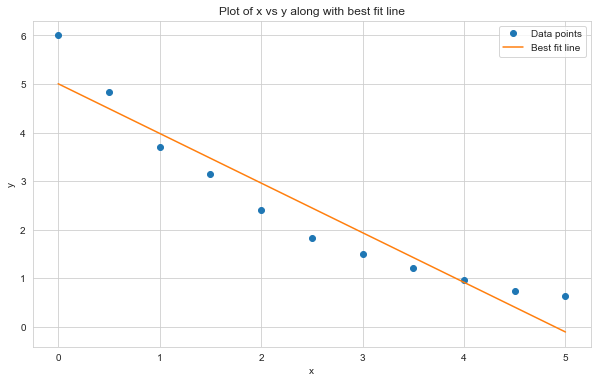

In [6]:
## Checking how good the straight line has fit to our data
plt.figure(figsize=(10,6))
plt.plot(x,y,'o',label='Data points')
plt.plot(x,B0+B1*x,label='Best fit line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of x vs y along with best fit line')
plt.legend()

For sure we can fit this data better with another curve instead of a line. For this we are going to plot x and y after taking their log transformations. We are going to plot 4 [subplots](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) to see how well they fit our data points.

C:\Users\samee\AppData\Local\Temp\ipykernel_78144\2275775432.py:7: RuntimeWarning: divide by zero encountered in log
  ax[0,1].plot(np.log(x),y); #this takes log of the x and keep the y intact
C:\Users\samee\AppData\Local\Temp\ipykernel_78144\2275775432.py:13: RuntimeWarning: divide by zero encountered in log
  ax[1,1].plot(np.log(x),np.log(y)); #this takes log of both x and y and plot them


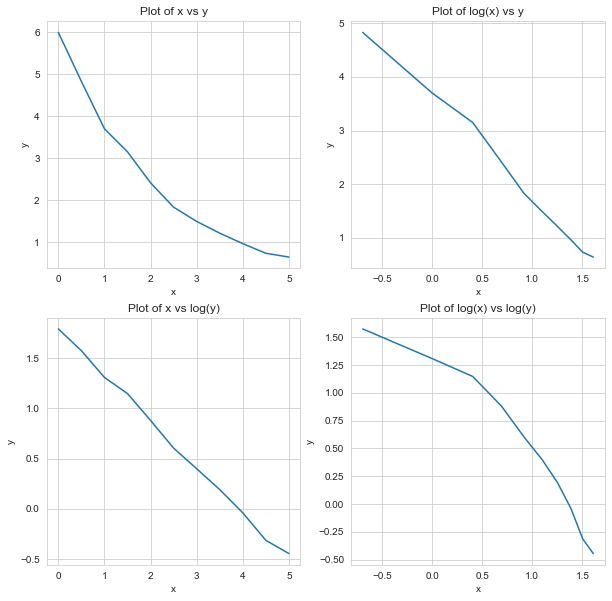

In [7]:
fig, ax = plt.subplots(2,2,figsize=(10,10)); # this gives us a figure with 4 subplots

## now we can slice into any subplot we want with indexing the axis
ax[0,0].plot(x,y); #simple plot between x and y
ax[0,0].set_title('Plot of x vs y')

ax[0,1].plot(np.log(x),y); #this takes log of the x and keep the y intact
ax[0,1].set_title('Plot of log(x) vs y')

ax[1,0].plot(x,np.log(y)); #this takes log of the y and keep the x intact
ax[1,0].set_title('Plot of x vs log(y)')

ax[1,1].plot(np.log(x),np.log(y)); #this takes log of both x and y and plot them
ax[1,1].set_title('Plot of log(x) vs log(y)')

#to add the x and y labels to all plots
for ax in ax.flat:
    ax.set(xlabel='x', ylabel='y')

The above graph reveals us that the plot of x and log(y) is very close to straight line so it is going to fit the data more accurately. This means that the exponential curve y = b*e^mx is going to fit our data the best.

we have, 
y = b * e^mx
\
taking log on both sides
\
log(y) = log(b * e^mx)
\
using property log(ab) = log(a)+log(b)
\
log(y) = log(b) + mx
\
here, we suppose log(y) as Y and log(b) as B
\
Y = B + mx
This equation is linear now and we are going to fit it using polyfit function

In [8]:
# fitting using polyfit function we get
m, B = np.polyfit(x,np.log(y),1)
# now to get the value of b
b = np.exp(B)
# our equation is y = b*e^mx
y_hat = b*np.exp(m*x)

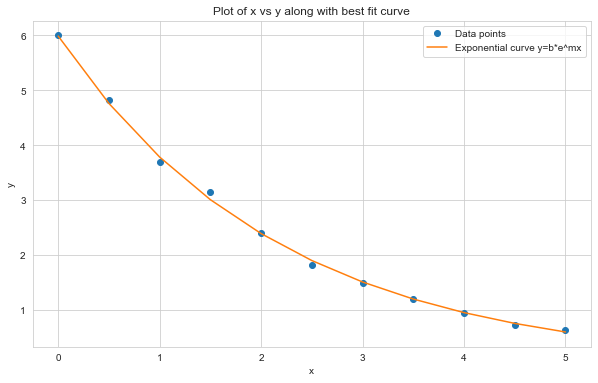

In [9]:
## Checking how good the exponential curve has fit to our data
plt.figure(figsize=(10,6))
plt.plot(x,y,'o',label='Data points')
plt.plot(x,y_hat,label='Exponential curve y=b*e^mx')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of x vs y along with best fit curve')
plt.legend()

## 1.3 Fitting a Power curve 

For Power curve the equation is given by,
y = b*x^m
\
taking log on both sides
\
log(y) = log(b) + log(x^m)
\
log(y) = log(b) + m*log(x)
\
suppose, y=log(y), B=log(b), X=log(x)
\
Y = B + m*X

In [10]:
def powerfit(x,y):
    x = np.log(x) # take the log of x values
    y = np.log(y) # take the log of y values
    x_bar = np.sum(x)/len(x) # calculate mean of x
    y_bar = np.sum(y)/len(y) # calculate mean of y
    B1 = np.sum((x-x_bar)*(y-y_bar))/np.sum((x-x_bar)**2) # for calculating B1 or m
    B0 = np.exp(y_bar - B1*x_bar) # for calculating b
    return B0,B1

In [11]:
x = np.array([0.5,2.4,3.2,4.9,6.5,7.8])
y = np.array([0.8,9.3,37.9,68.2,155,198])
b,m = powerfit(x,y)

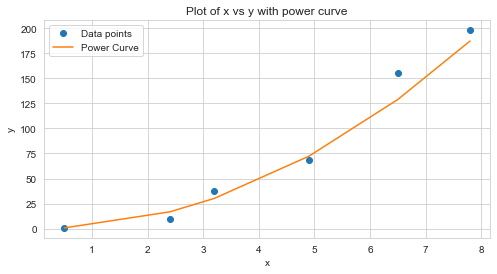

In [12]:
plt.figure(figsize=(8,4))
plt.plot(x,y,'o',label='Data points');
plt.plot(x,b*x**m,label = 'Power Curve');
plt.title('Plot of x vs y with power curve');
plt.xlabel('x');
plt.ylabel('y');
plt.legend();

## 1.4 Generating an Ice Cream Cone

For this task we are going to leverage the mpl_toolkits library which gives us the 3D plotting capabilities.

In [13]:
from mpl_toolkits import mplot3d

Let's first define the variables.

In [14]:
radius = np.linspace(0,2,100) #radius of cone
theta = np.linspace(0,2*np.pi,100) #theta for both cone and hemisphere
phi = np.linspace(0,np.pi,100) #phi for hemisphere
radius_hemi = 2

The equation of cone can be given as,
\
\
$x=r \cos \theta, y=r \sin \theta, z=4 r$
\
With $θ ∈ [0, 2π] and  r ∈ [0, 2]$
\
\
Similarly, for hemisphere the equations are
\
\
$x=r \cos \theta \sin \phi, y=r \sin \theta \sin \phi, z=8+r \cos \phi$
\
With $θ ∈ [0, 2π] and ϕ ∈ [0, π]$

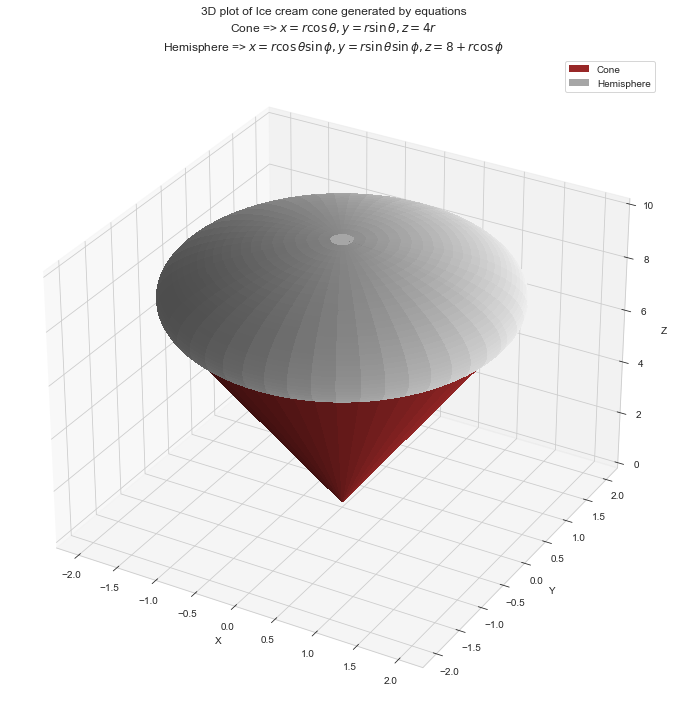

In [15]:
## Firstly we will draw the cone for this we need pairs of radius and theta
r_cone, theta_cone = np.meshgrid(radius,theta)

## now the equations of X,Y,Z will be given as
X = r_cone*np.cos(theta_cone)
Y = r_cone*np.sin(theta_cone)
Z = 4*r_cone

#plotting a cone
plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X,Y,Z,color='brown',linewidth=0, antialiased=False, label = 'Cone' )
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d

## Now we will draw the hemisphere
theta_hemi, phi_hemi = np.meshgrid(theta,phi)
r_hemi = 2

Xh = r_hemi*np.cos(theta_hemi)*np.sin(phi_hemi)
Yh = r_hemi*np.sin(theta_hemi)*np.sin(phi_hemi)
Zh = 8+r_hemi*np.cos(phi_hemi)
surf = ax.plot_surface(Xh,Yh,Zh,color='white',linewidth=0, antialiased=False, label='Hemisphere')
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d
ax.set_title('3D plot of Ice cream cone generated by equations'+'\n'+r'Cone => $x=r \cos \theta, y=r \sin \theta, z=4 r$' +'\n'+
r'Hemisphere => $x=r \cos \theta \sin \phi, y=r \sin \theta \sin \phi, z=8+r \cos \phi$');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');
ax.legend();

# Exploratory Analysis of Real Data

## Task 1

In [16]:
# opening the data as pandas DataFrame object
df = pd.read_csv('task1.txt')

In [17]:
# firstly we will explore some macro structure of the data like which columns it has and their dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99260 entries, 0 to 99259
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               99260 non-null  int64  
 1   Month              99260 non-null  int64  
 2   DayofMonth         99260 non-null  int64  
 3   DayOfWeek          99260 non-null  int64  
 4   DepTime            97847 non-null  float64
 5   CRSDepTime         99260 non-null  int64  
 6   ArrTime            97693 non-null  float64
 7   CRSArrTime         99260 non-null  int64  
 8   UniqueCarrier      99260 non-null  object 
 9   FlightNum          99260 non-null  int64  
 10  TailNum            98156 non-null  object 
 11  ActualElapsedTime  97659 non-null  float64
 12  CRSElapsedTime     99249 non-null  float64
 13  AirTime            97659 non-null  float64
 14  ArrDelay           97659 non-null  float64
 15  DepDelay           97847 non-null  float64
 16  Origin             992

There are in total 29 columns and most of the columns have missing values. We will deal with missing values later.

In [18]:
#Firstly We will try to answer the timeframe of which the data is available  
print('The year of the flights is',df['Year'].unique())
#Now the months
print('The months of the flights are',df['Month'].unique())
#Now the days
print('The days of the flights are',df['DayofMonth'].unique())

The year of the flights is [2008]
The months of the flights are [ 1  2  3  4  5  6  7  8  9 10 11 12]
The days of the flights are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


So we are given with the data of 2008 of all 12 months and for all of those days.

In [19]:
## let's check how many unique airlines are there
df['UniqueCarrier'].nunique()

16

Let's see how many flights have flew in each month

Currently, our year, month and date columns are different, in order to have nice visualizations, it is better to have them combined in one column too. For this purpose, we are going to write a function that combines year, month, and date togather.

In [20]:
#function to join the date combining the year month and day
def make_date(cols):
    year = cols[0]
    month = cols[1]
    day = cols[2]
    return str(year)+'-'+str(month)+'-'+str(day)

In [21]:
df['date'] = pd.to_datetime(df[['Year','Month','DayofMonth']].apply(make_date,axis=1))

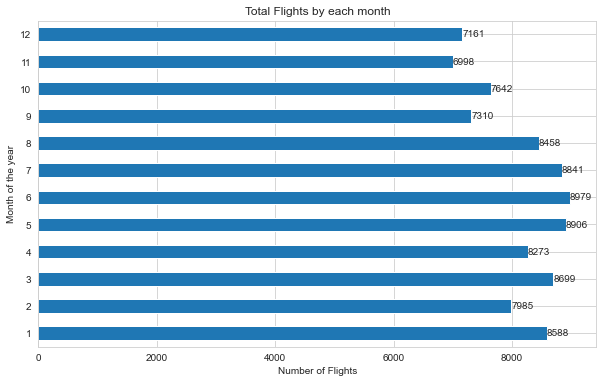

In [22]:
dfcc = df[df['Cancelled'] == 0].copy() # to filter out cancelled flights
plt.figure(figsize=(10,6))
ax = dfcc.groupby('Month').count()['Year'].plot(kind='barh')
ax.bar_label(ax.containers[0]);
plt.title('Total Flights by each month');
plt.xlabel('Number of Flights');
plt.ylabel('Month of the year');

The month of May and June has the most number of flights. Is it because summers? probably

Let's explore the air traffic on daily basis.

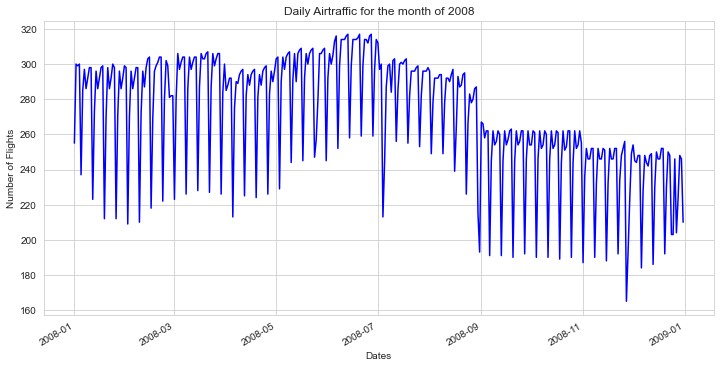

In [23]:
dfm = df.groupby('date').count()['Year']
plt.figure(figsize=(12,6))
plt.title('Daily Airtraffic for the month of 2008')
plt.xlabel('Dates')
plt.ylabel('Number of Flights')
plt.plot(dfm.index,dfm.values,color='blue')

plt.gcf().autofmt_xdate()

Let's also answer if the airtraffic is influenced by the day of the month

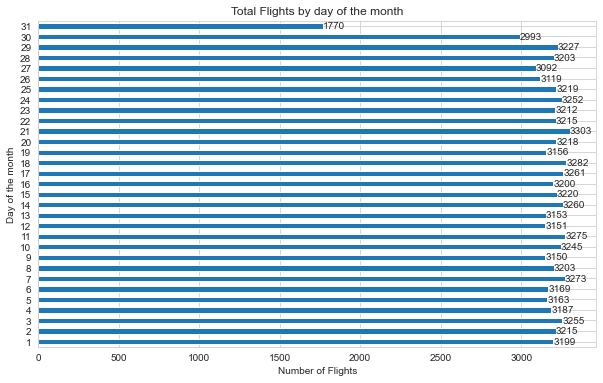

In [24]:
plt.figure(figsize=(10,6))
ax = dfcc.groupby('DayofMonth').count()['Year'].plot(kind='barh')
ax.bar_label(ax.containers[0]);
plt.title('Total Flights by day of the month');
plt.xlabel('Number of Flights');
plt.ylabel('Day of the month');

Not really, The number is almost same.

Firstly, we will try to answer what time of the day is best to travel with least possible delay. For this let's first make a column of Total Delay in minutes of flight.

In [25]:
df['delay'] = df['ArrDelay'] + df['DepDelay']

Let's first check how many values of delays are missing from our data.

In [26]:
df['delay'].isna().sum()

1601

The number is in thousands but if we see in terms of proportion of data it is about 1.6%. We can continue with our current analysis by ignoring the missing values. Now instead of picking an accurate time along with minutes will not be much appropriate as it will contains flight that flew very less times. It is far more better to calculate the hour range in which the flight flew and had minimum delay. Also, we are going to use CRSDepTime column as you do not already know when flight actually flies. Also, here we do not have to worry about the flights that were cancelled as they have Nan value in the delay column that we have just made.

In [27]:
#let's divide our timings into bins where departure time is put into one of the hour bin
bins = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
b_name = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [28]:
#let's create a dummy variable that stores the hour at which the flight was scheduled
df['CRSDepHour'] = pd.cut(df['CRSDepTime'], bins, labels=b_name)

<AxesSubplot:title={'center':'Delay in flights in minutes based on hour of the day'}, ylabel='Hour of the Day'>

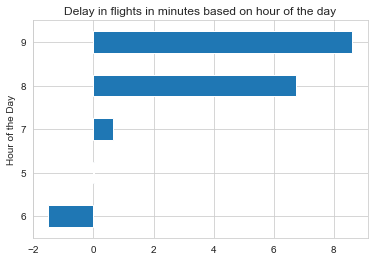

In [29]:
df.groupby('CRSDepHour').mean()['delay'].sort_values().head(5).plot(kind='barh',title='Delay in flights in minutes based on hour of the day',xlabel='Hour of the Day')

This tells us that the flights that flies between the **6 am to 7 am** are on average few minutes ahead of time. Next are the flights between **5 am and 6 am**, followed by flights from **7 am to 8 am**. Generally the morning flights have less delay. 

Now, Let's check if this delay is influenced by the airline

In [30]:
a = df.groupby(['UniqueCarrier','CRSDepHour'])['delay'].mean().unstack().reset_index().set_index('UniqueCarrier')

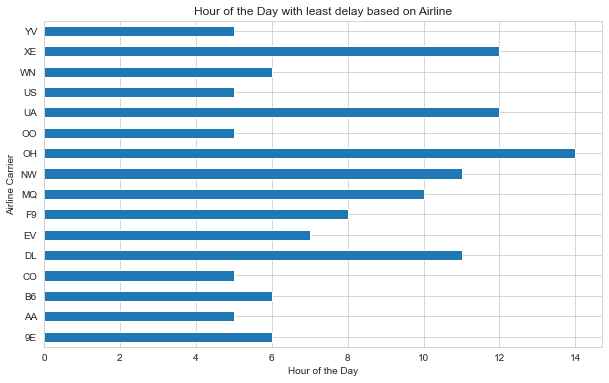

In [31]:
plt.figure(figsize=(10,6))
a.idxmin(axis=1).astype('int').plot(kind='barh')
plt.title('Hour of the Day with least delay based on Airline');
plt.ylabel('Airline Carrier');
plt.xlabel('Hour of the Day');

We can see that for most of the airlines the minimun delay happens for the flight between **5 am to 8am**. However, the airline OH has the minimun delay at **2 pm to 3 pm**. 

Let's explore which airline has the highest delay

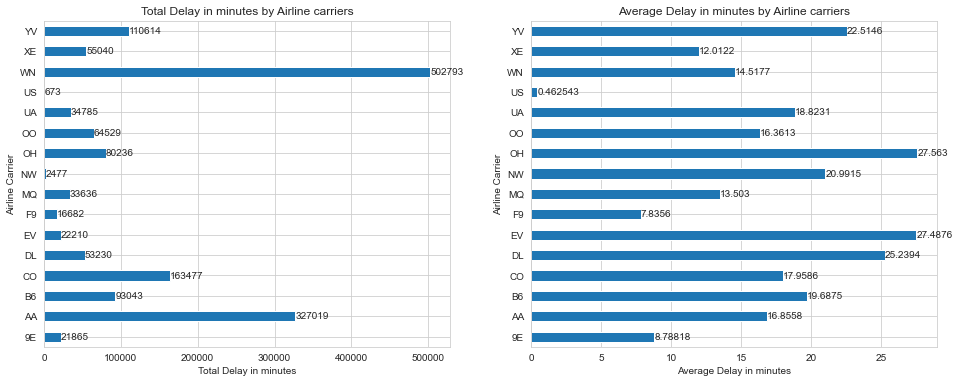

In [32]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = df.groupby(['UniqueCarrier'])['delay'].sum().plot(kind='barh')
plt.title('Total Delay in minutes by Airline carriers');
plt.ylabel('Airline Carrier');
plt.xlabel('Total Delay in minutes');
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = df.groupby(['UniqueCarrier'])['delay'].mean().plot(kind='barh')
plt.title('Average Delay in minutes by Airline carriers');
plt.ylabel('Airline Carrier');
plt.xlabel('Average Delay in minutes');
ax.bar_label(ax.containers[0]);

The **WN** has the most delay time (502793 minutes) while **US** has the lowest (673 minutes). However, **OH** has the highest avg delay while **US** still has the lowest.

In [33]:
dfc = df.groupby('date').mean()['delay'] # make a copy of the dataframe

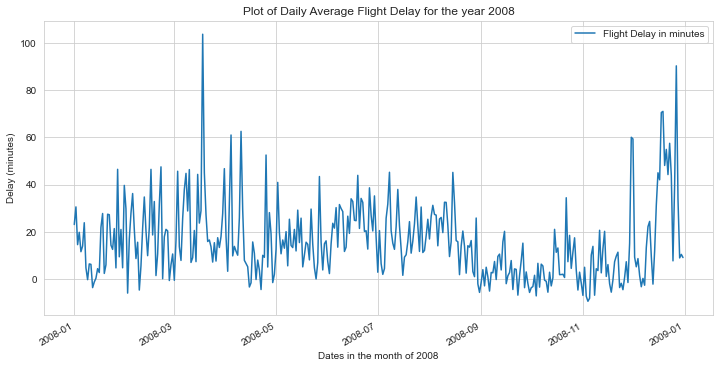

In [34]:
plt.figure(figsize=(12,6))
plt.title('Plot of Daily Average Flight Delay for the year 2008')
plt.xlabel('Dates in the month of 2008')
plt.ylabel('Delay (minutes)')
plt.plot(dfc.index,dfc.values,label='Flight Delay in minutes')

#plt.xticks(dfc.index,dfc.index);
plt.gcf().autofmt_xdate()
plt.legend()

We can see that between the months of **September and November** The flight delay is generally lower with occational spikes, however, the overall mean is still low during that period. In general we can say that for the last quarter the flight delay is less. However, at the end of year we have spikes which may be because of Holiday Season.

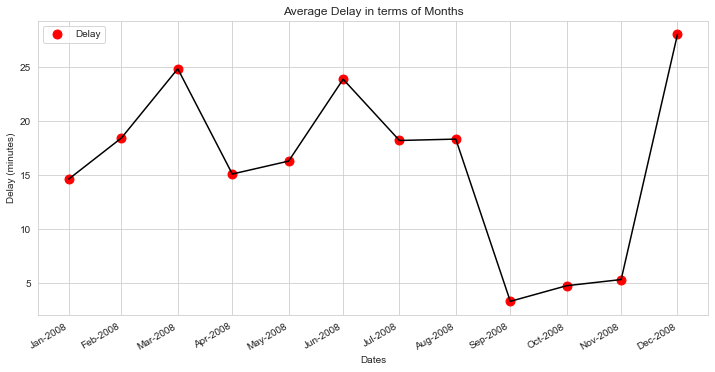

In [35]:
#let's also explore by quarter
dfc = df.set_index('date')
dfm =dfc.resample('M').mean()['delay']

plt.figure(figsize=(12,6))
plt.title('Average Delay in terms of Months')
plt.xlabel('Dates')
plt.ylabel('Delay (minutes)')
plt.plot(dfm.index,dfm.values,color='black')
plt.scatter(dfm.index,dfm.values,label='Delay',s=80,color='red')
plt.xticks(dfm.index,dfm.index);
plt.gcf().autofmt_xdate()

date_fmt = mdates.DateFormatter("%b-%Y")
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.legend();

We can see that the Months of **September to November** has the lowest average flight delay in terms of minutes. 

Now let's try to answer if the destination affects the delay.

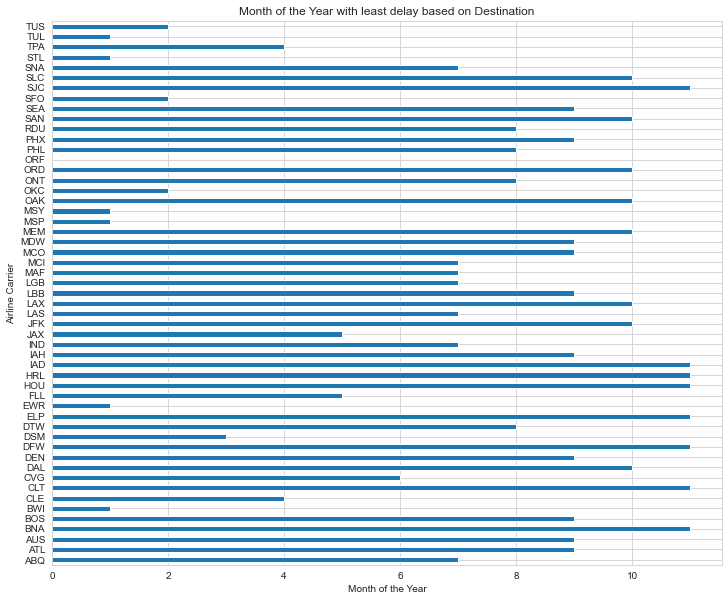

In [36]:
plt.figure(figsize=(12,10))
df.groupby(['Dest','Month'])['delay'].mean().unstack().reset_index().set_index('Dest').idxmin(axis=1).plot(kind='barh')
plt.title('Month of the Year with least delay based on Destination');
plt.ylabel('Airline Carrier');
plt.xlabel('Month of the Year');

It seems the distribution is not consistent, some flights have lower delay in last quater while some has lower delays in second quarter. 

Let's explore which airlines are most famous and which destinations are busiest

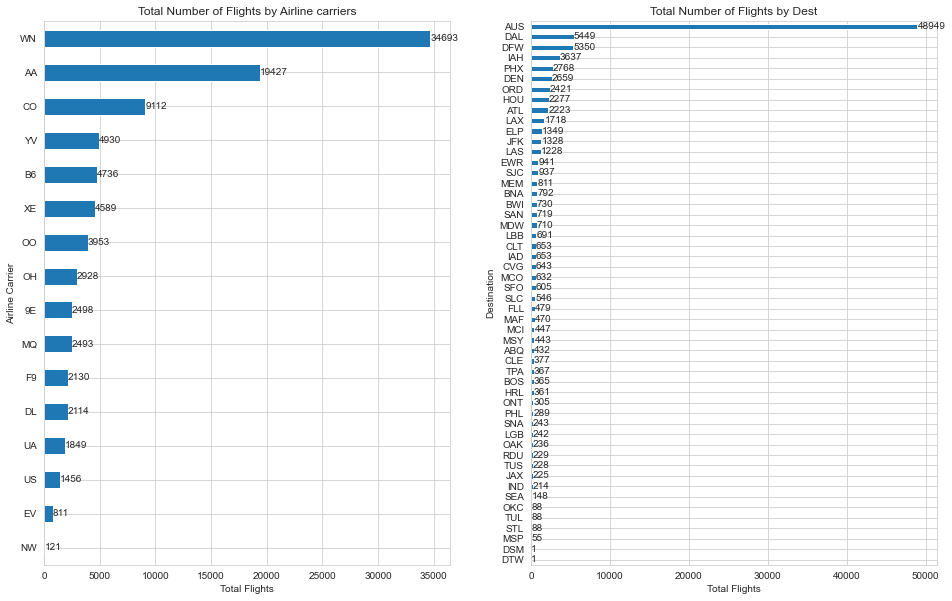

In [37]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
ax = dfcc.groupby('UniqueCarrier').count()['Year'].sort_values().plot(kind='barh')
plt.title('Total Number of Flights by Airline carriers');
plt.ylabel('Airline Carrier');
plt.xlabel('Total Flights');
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = dfcc.groupby('Dest').count()['Year'].sort_values().plot(kind='barh')
plt.title('Total Number of Flights by Dest');
plt.ylabel('Destination');
plt.xlabel('Total Flights');
ax.bar_label(ax.containers[0]);

Here we can see that the **AUS** is the most famous Destination which is the most popular destination with **(48949)** flights. **DAL** and **DFW** are next in the list. While the **WN** is the most busiest airline while **AA** and **CO** are on second.

Let's explore some Destinations which has the highest delay

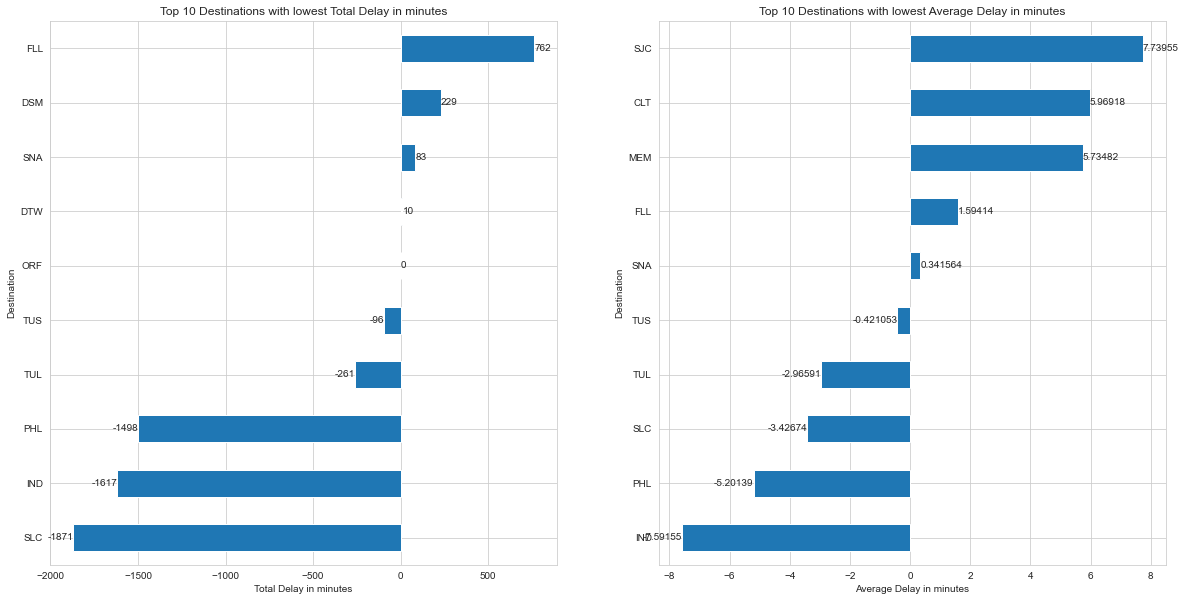

In [38]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.subplot(1,2,1)
ax = df.groupby(['Dest'])['delay'].sum().sort_values().head(10).plot(kind='barh')
plt.title('Top 10 Destinations with lowest Total Delay in minutes');
plt.ylabel('Destination');
plt.xlabel('Total Delay in minutes');
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = df.groupby(['Dest'])['delay'].mean().sort_values().head(10).plot(kind='barh')
plt.title('Top 10 Destinations with lowest Average Delay in minutes');
plt.ylabel('Destination');
plt.xlabel('Average Delay in minutes');
ax.bar_label(ax.containers[0]);

Here we can see that the flights going to **SLC** in total reached 187 minutes earlier there. While on average flights to **IND** reach 7.59 minutes earlier there.

Let's explore the airport with most delay

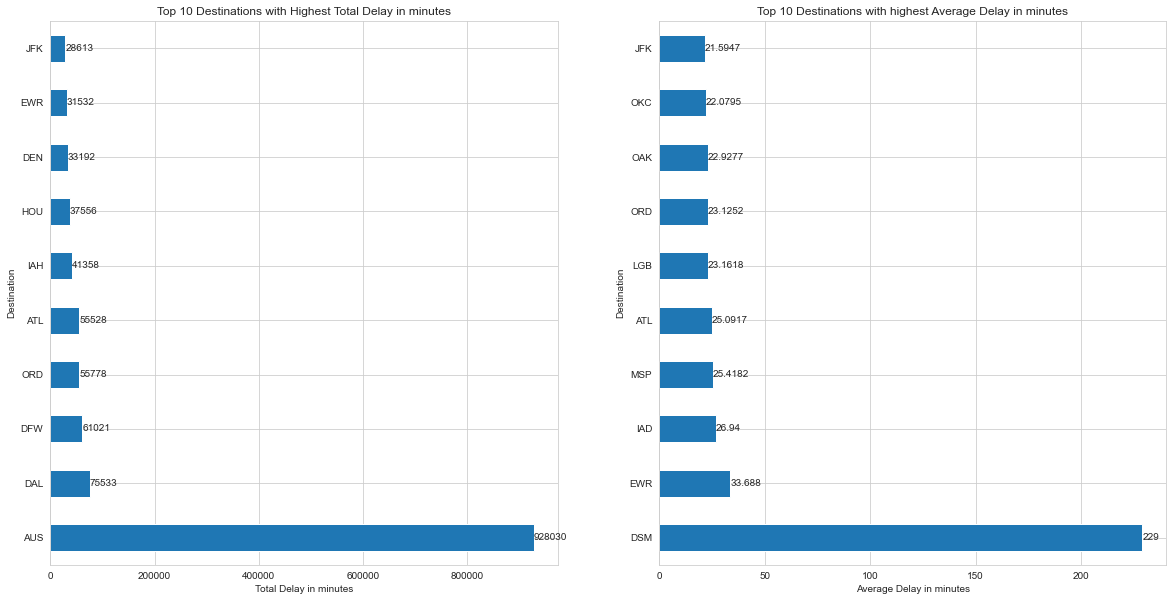

In [39]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.subplot(1,2,1)
ax = df.groupby(['Dest'])['delay'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Destinations with Highest Total Delay in minutes');
plt.ylabel('Destination');
plt.xlabel('Total Delay in minutes');
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = df.groupby(['Dest'])['delay'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Destinations with highest Average Delay in minutes');
plt.ylabel('Destination');
plt.xlabel('Average Delay in minutes');
ax.bar_label(ax.containers[0]);

Here the **AUS** has the highest total delay in minutes while DSM has the highest average delay in minutes. Since it has only one observation in the dataset, we will not consider it and instead pick **EWR** as the worst destination with on average 34 minutes delay.

We will explore EWR and see if any time of the day and year effect delay.

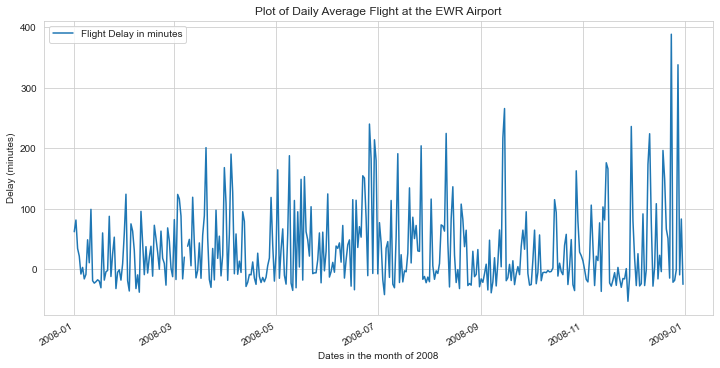

In [40]:
plt.figure(figsize=(12,6))
dfc = df[df['Dest'] == 'EWR'].groupby('date').mean()['delay']
plt.title('Plot of Daily Average Flight at the EWR Airport')
plt.xlabel('Dates in the month of 2008')
plt.ylabel('Delay (minutes)')
plt.plot(dfc.index,dfc.values,label='Flight Delay in minutes')

plt.gcf().autofmt_xdate()
plt.legend()

Here we can see that for the starting month the delay is still high, however, lower than the rest of the year. There are a lot of spikes which shows long delays for the passengers. The time of the year seem to have impact over the delay as the spikes are rising along the x-axis

Let's explore if we can find any particular time of the day which has notoriously high number of delays.

Text(0, 0.5, 'Hour of the Day')

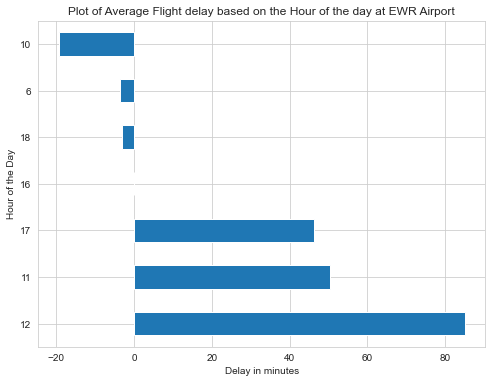

In [41]:
plt.figure(figsize=(8,6))
df[df['Dest'] == 'EWR'].groupby('CRSDepHour')['delay'].mean().sort_values(ascending=False).head(7).plot(kind='barh')
plt.title('Plot of Average Flight delay based on the Hour of the day at EWR Airport')
plt.xlabel('Delay in minutes')
plt.ylabel('Hour of the Day')

Flights happening between the time **12 pm to 1 pm** and nextly the flights between **11 pm to 12 pm** cause the highest average delay while the flight between **10 am to 11 am** reaches almost 20 minutes before the estimated time.

Let's explore for one more destination

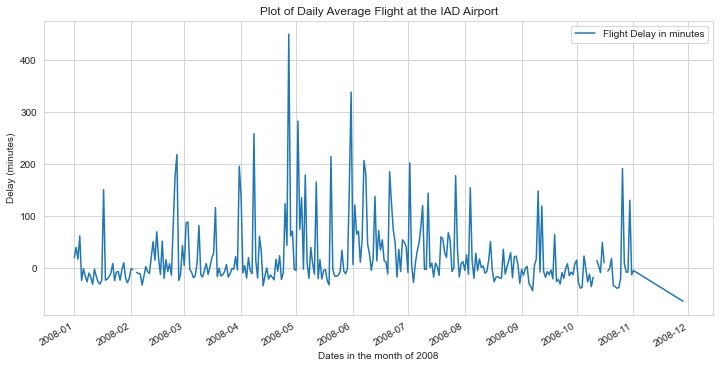

In [42]:
plt.figure(figsize=(12,6))
dfc = df[df['Dest'] == 'IAD'].groupby('date').mean()['delay']
plt.title('Plot of Daily Average Flight at the IAD Airport')
plt.xlabel('Dates in the month of 2008')
plt.ylabel('Delay (minutes)')
plt.plot(dfc.index,dfc.values,label='Flight Delay in minutes')

plt.gcf().autofmt_xdate()
plt.legend()

The second quarter has the highest average delay. 

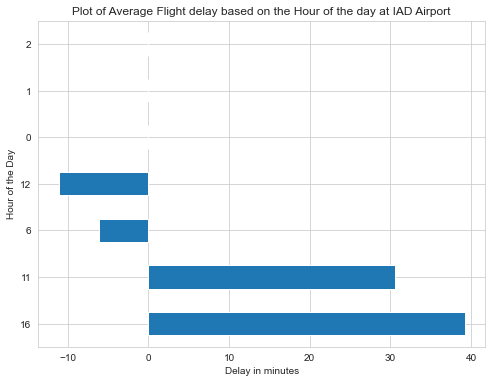

In [43]:
plt.figure(figsize=(8,6))
df[df['Dest'] == 'IAD'].groupby('CRSDepHour')['delay'].mean().sort_values(ascending=False).head(7).plot(kind='barh')
plt.title('Plot of Average Flight delay based on the Hour of the day at IAD Airport')
plt.xlabel('Delay in minutes');
plt.ylabel('Hour of the Day');

Here the pattern is changed. Flights between **4 pm to 5 pm** have the highest average delay.

Let's explore how the pattern of flights has altered over the course of years.

In [44]:
dfc = dfcc[(dfcc['Dest'] == 'AUS') | (dfcc['Dest'] == 'DAL') | (dfcc['Dest'] == 'DFW')]

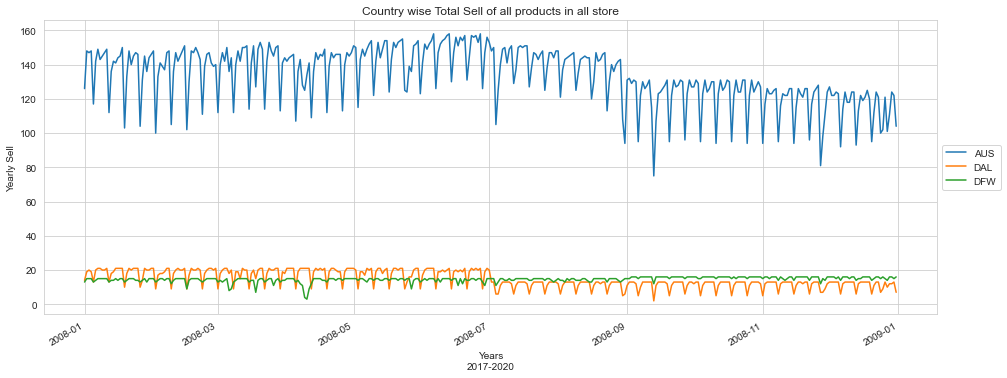

In [45]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(data=dfc.groupby(['Dest','date']).count(), x='date', y='Year', hue='Dest')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlabel('Years\n2017-2020')
plt.ylabel('Yearly Sell')
plt.title('Country wise Total Sell of all products in all store');
plt.gcf().autofmt_xdate()

For **AUS** and **DAL** there is a decline after the month of July in the number of flights.

## Task 2

Let's read the data

In [46]:
df = pd.read_csv('task2.txt')

In [47]:
#to see if that data has missing values
df.isnull().any()

id        False
name      False
sex       False
age       False
height    False
weight    False
team      False
noc       False
games     False
year      False
season    False
city      False
sport     False
event     False
medal     False
dtype: bool

Amazing, the data is complete. 

To explore the type of features that are present in the dataset

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23850 entries, 0 to 23849
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      23850 non-null  int64  
 1   name    23850 non-null  object 
 2   sex     23850 non-null  object 
 3   age     23850 non-null  int64  
 4   height  23850 non-null  int64  
 5   weight  23850 non-null  float64
 6   team    23850 non-null  object 
 7   noc     23850 non-null  object 
 8   games   23850 non-null  object 
 9   year    23850 non-null  int64  
 10  season  23850 non-null  object 
 11  city    23850 non-null  object 
 12  sport   23850 non-null  object 
 13  event   23850 non-null  object 
 14  medal   23850 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 2.7+ MB


We have here, 10 categorical features, and 4 numeric features. Here we are ignoring the id column as it is not necessary.

**Question:** To compute the 95th percentile of female competitors in atheletic event.

Let's answer for all female athelatic sports

In [49]:
## to filter athelatic events
dfc = df[df['sport'] == 'Athletics']
dfc = dfc[dfc['event'].str.contains("Women")]
## to get 95th percentile value
print('The 95th Percentile value of Female height is',np.percentile(dfc['height'],95),'cm for all female athelatic sports')

The 95th Percentile value of Female height is 183.0 cm for all female athelatic sports


Let's answer for 100-meter sprint only

In [50]:
#let's filter the sport first
dfc = df[df['sport'] == 'Athletics']
#let's filter the event from here
dfc = dfc[dfc['event'] == "Athletics Women's 100 metres"]

In [51]:
#To calculate percentile
print('The 95th Percentile value of Female height is',np.percentile(dfc['height'],95),'cm for 100-meter sprint')

The 95th Percentile value of Female height is 179.6 cm for 100-meter sprint


**Question:** Single Woman event with highest variability in heights

We can identify the variability based on the standard deviation.
\
Let's first find the top 5 woman event with highest variabile in heights.

In [52]:
df[df['event'].str.contains("Women")].groupby('event')['height'].std().sort_values(ascending=False).head(5)

event
Rowing Women's Coxed Fours               10.865490
Basketball Women's Basketball             9.700255
Rowing Women's Coxed Quadruple Sculls     9.246396
Rowing Women's Coxed Eights               8.741931
Swimming Women's 100 metres Butterfly     8.134399
Name: height, dtype: float64

**Rowing Women's Coxed Fours** has the highest variability in height.

Let's find the event with highest variability for all woman athelatic events.

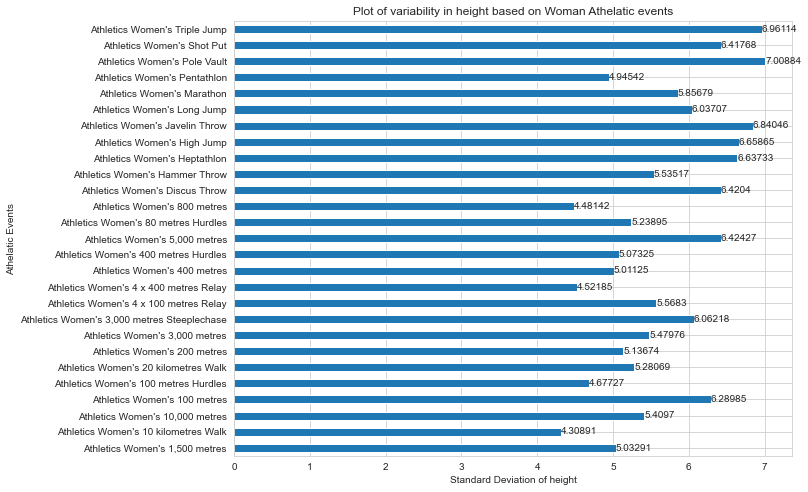

In [53]:
#let's filter the sport first
dfc = df[df['sport'] == 'Athletics']

## filtering the event out and plotting it
plt.figure(figsize=(10,8));
ax = dfc[dfc['event'].str.contains('Women')].groupby('event')['height'].std().plot(kind='barh')
plt.title('Plot of variability in height based on Woman Athelatic events');
plt.ylabel('Athelatic Events');
plt.xlabel('Standard Deviation of height');
ax.bar_label(ax.containers[0]);

**Women's Pole Vault** has the highest variability followed by **Women's Triple Jump** and **Women's Javelin Throw**

**Question:** To answer how the average age of male and female swimmers has evolved over time.

In [54]:
## let's filter the dataframe with swiiming relating events only
dfs = df[df['sport'] == 'Swimming']

## now it is time to separate out male and female swimmers
dfm = dfs[dfs['event'].str.contains("Men's")]
dfm = dfm.groupby('year')['age'].mean()

dff = dfs[dfs['event'].str.contains("Women's")]
dff = dff.groupby('year')['age'].mean()

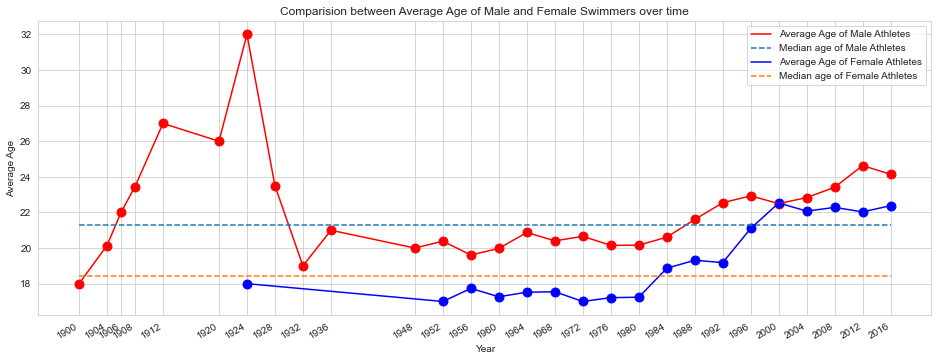

In [55]:
plt.figure(figsize=(16,6))

plt.plot(dfm,color='red',label='Average Age of Male Athletes')
plt.plot(dfm.index, [dfm.median()]*len(dfm), label='Median age of Male Athletes',linestyle='--')
plt.scatter(dfm.index,dfm.values,s=80,color='red')
plt.xticks(dfm.index,dfm.index);
plt.gcf().autofmt_xdate()

plt.plot(dff,color='blue',label='Average Age of Female Athletes')
plt.plot(dfm.index, [dff.median()]*len(dfm), label='Median age of Female Athletes',linestyle='--')
plt.scatter(dff.index,dff.values,s=80,color='blue')
plt.title('Comparision between Average Age of Male and Female Swimmers over time');
plt.xlabel('Year');
plt.ylabel('Average Age');
plt.legend();

The Average of Male swimmers taking part in olymipic started to rise from the year 1900 to 1912 from which the average age rose from 18 to 27. Then in the year 1924 it became 32. After which the popularity of this sport again rose in the young ones and it dropped in the year 1932. Now since then it is continuously increasing and after the year 1980 it is sharply increasing with the years and in the year 2016 it reached 24. For Female Atheletes, They are relatively younger, However, similar to Male ones, before the year 1980 the trend was somewhat stable. Nevertheless, after the year 1980, it has started to rise. In the year 2000, the average age of male participating was similar to average age of females.